In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
stores_orders=pd.read_excel('Sample - Superstore.xls',sheet_name='Orders')
stores_people=pd.read_excel('Sample - Superstore.xls',sheet_name='People')
stores_returns=pd.read_excel('Sample - Superstore.xls',sheet_name='Returns')

In [3]:
stores_orders.shape, stores_people.shape, stores_returns.shape

((9994, 21), (4, 2), (800, 2))

In [4]:
stores_orders.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10001798        Furniture    Bookcases   
1     42420.0   South  FUR-CH-10000454        Furniture       Chairs   
2     90036.0    West  OFF-LA-10000240  Office Supplies       Labels   
3     33311.0   South  FUR-TA-10000577        Furniture       Tables   
4     33311.0   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [5]:
stores_orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
len(set(stores_orders['Customer Name'])), len(set(stores_orders['Customer ID']))

(793, 793)

In [7]:
customers=stores_orders.groupby('Customer Name')

In [8]:
customers.describe()

Row ID                                             \
                      count         mean          std     min      25%   
Customer Name                                                            
Aaron Bergman           6.0  6786.166667  2008.357679  4962.0  4963.25   
Aaron Hawkins          11.0  6786.454545  2337.602420  3200.0  5355.50   
Aaron Smayling         10.0  3533.400000  3225.635310  1341.0  1345.25   
Adam Bellavance        18.0  4229.111111  3658.292705   350.0   559.50   
Adam Hart              20.0  6847.300000  2553.528974   925.0  6044.75   
Adam Shillingsburg     25.0  5239.280000  2880.808835  1895.0  2403.00   
Adrian Barton          20.0  6504.400000  2645.217818  1410.0  4283.75   
Adrian Hane            16.0  5907.000000  1507.015240  2103.0  5655.75   
Adrian Shami            3.0   965.666667   724.286085   547.0   547.50   
Aimee Bixby            12.0  4849.500000  3366.723670  1556.0  1599.75   
Alan Barnes            14.0  3754.571429  2747.958451   693.0   931.25   
Alan Dominguez         12.0  2782.583333  2963.786812   125.0   517.75   
Alan Haines             8.0  3191.375000  2496.335196   287.0   288.75   
Alan Hwang             13.0  4954.461538  2389.531042   266.0  4416.00   
Alan Schoenberger      13.0  2943.846154  1941.113291   305.0  1978.00   
Alan Shonely           13.0  3867.692308  3936.257262   603.0   606.00   
Alejandro Ballentine   14.0  3704.928571  2109.279588  1331.0  2706.25   
Alejandro Grove        14.0  6713.357143  2070.335856    18.0  7381.25   
Alejandro Savely        8.0  4141.375000  3429.524288   382.0   623.00   
Aleksandra Gannaway     5.0  3999.800000  1803.780114  2615.0  2616.00   
Alex Avila             11.0  3983.909091  2439.561455  1160.0  1765.00   
Alex Grayson            9.0  6055.111111  1112.738339  4353.0  6158.00   
Alex Russell            5.0  6627.400000  1215.298646  4926.0  5768.00   
Alice McCarthy         12.0  4491.833333  3636.709373   188.0  2349.75   
Allen Armold           15.0  4060.000000  3213.054110   536.0  1576.00   
Allen Goldenen          8.0  3997.500000  3027.531809  1034.0  1035.75   
Allen Rosenblatt        7.0  2532.000000  2421.013975   378.0   653.50   
Alyssa Crouse           5.0  2125.800000  2420.476131   338.0   339.00   
Alyssa Tate             9.0  4320.111111  2797.950252  1177.0  1504.00   
Amy Cox                 9.0  3952.333333  1186.371991  1897.0  3026.00   
...                     ...          ...          ...     ...      ...   
Tony Molinari           4.0  5093.250000   368.014832  4543.0  5062.00   
Tony Sayre             14.0  5434.357143  1882.419499  3320.0  3559.25   
Tracy Blumstein        20.0  2569.600000  3490.388945    28.0    32.75   
Tracy Collins          10.0  5528.800000  2763.426287  1303.0  3468.00   
Tracy Hopkins          13.0  2652.769231  1468.814780   711.0   894.00   
Tracy Poddar           10.0  6199.700000  1449.442655  4165.0  6306.25   
Tracy Zic               9.0  4278.000000  2692.479805   982.0   984.00   
Troy Blackwell          7.0  5904.285714  3487.192362   447.0  4248.50   
Troy Staebel           11.0  3531.727273  3237.179763   127.0  1341.00   
Trudy Brown            15.0  6615.133333  2491.725388  2137.0  4598.50   
Trudy Glocke           10.0  5605.800000  3766.300743   576.0  1851.25   
Trudy Schmidt          14.0  7798.285714   772.097685  6051.0  7890.25   
Valerie Dominguez      16.0  1945.875000  1584.342550   229.0  1376.75   
Valerie Mitchum        12.0  3101.333333  2552.980801   198.0  1858.75   
Valerie Takahito        9.0  4192.555556   855.169736  3904.0  3906.00   
Vicky Freymann         11.0  5444.454545  2187.083143  2852.0  4092.00   
Victor Preis            5.0  4031.200000  2320.094653   395.0  3003.00   
Victoria Brennan       10.0  3230.200000  3436.971108   360.0   701.00   
Victoria Pisteka       14.0  8511.928571  1009.666774  6623.0  7790.50   
Victoria Wilson        18.0  3093.166667  2833.550034   213.0   542.75   
Vivek Gonzalez          8

In [9]:
# Extracting each customer and associated data with him

for cust,cust_df in customers:
    print(cust)
    print(cust_df)

Aaron Bergman
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
4961    4962  CA-2015-156587 2015-03-07 2015-03-08     First Class   
4962    4963  CA-2015-156587 2015-03-07 2015-03-08     First Class   
4963    4964  CA-2015-156587 2015-03-07 2015-03-08     First Class   
8222    8223  CA-2015-152905 2015-02-18 2015-02-24  Standard Class   
8801    8802  CA-2017-140935 2017-11-10 2017-11-12     First Class   
8802    8803  CA-2017-140935 2017-11-10 2017-11-12     First Class   

     Customer ID  Customer Name   Segment        Country           City  ...  \
4961    AB-10015  Aaron Bergman  Consumer  United States        Seattle  ...   
4962    AB-10015  Aaron Bergman  Consumer  United States        Seattle  ...   
4963    AB-10015  Aaron Bergman  Consumer  United States        Seattle  ...   
8222    AB-10015  Aaron Bergman  Consumer  United States      Arlington  ...   
8801    AB-10015  Aaron Bergman  Consumer  United States  Oklahoma City  ...   
8802    AB-1001

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
692      693  CA-2016-131534 2016-03-28 2016-04-02  Standard Class   
693      694  CA-2016-131534 2016-03-28 2016-04-02  Standard Class   
929      930  CA-2018-144932 2018-04-14 2018-04-17     First Class   
930      931  CA-2018-144932 2018-04-14 2018-04-17     First Class   
931      932  CA-2018-144932 2018-04-14 2018-04-17     First Class   
3433    3434  CA-2018-131212 2018-12-05 2018-12-09  Standard Class   
3434    3435  CA-2018-131212 2018-12-05 2018-12-09  Standard Class   
4314    4315  CA-2016-115945 2016-06-25 2016-07-01  Standard Class   
4315    4316  CA-2016-115945 2016-06-25 2016-07-01  Standard Class   
4316    4317  CA-2016-115945 2016-06-25 2016-07-01  Standard Class   
5303    5304  US-2015-139500 2015-11-16 2015-11-20  Standard Class   
6132    6133  CA-2018-145737 2018-09-15 2018-09-20  Standard Class   
8464    8465  CA-2016-144043 2016-05-10 2016-05-15  Standard Class   
8664    8665  CA-201

Brad Norvell
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
704      705  CA-2015-138527 2015-09-12 2015-09-17  Standard Class   
705      706  CA-2015-138527 2015-09-12 2015-09-17  Standard Class   
706      707  CA-2015-138527 2015-09-12 2015-09-17  Standard Class   
5249    5250  CA-2016-106215 2016-04-16 2016-04-21  Standard Class   
6905    6906  US-2018-149006 2018-12-06 2018-12-08    Second Class   
8439    8440  CA-2018-114370 2018-03-14 2018-03-17    Second Class   

     Customer ID Customer Name    Segment        Country          City  ...  \
704     BN-11470  Brad Norvell  Corporate  United States          Cary  ...   
705     BN-11470  Brad Norvell  Corporate  United States          Cary  ...   
706     BN-11470  Brad Norvell  Corporate  United States          Cary  ...   
5249    BN-11470  Brad Norvell  Corporate  United States  Philadelphia  ...   
6905    BN-11470  Brad Norvell  Corporate  United States     Brentwood  ...   
8439    BN-11470  Brad

[8 rows x 21 columns]
Cari Schnelling
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
4768    4769  CA-2018-158883 2018-06-02 2018-06-03        Same Day   
5152    5153  US-2015-121566 2015-06-30 2015-07-06  Standard Class   
5153    5154  US-2015-121566 2015-06-30 2015-07-06  Standard Class   
6831    6832  US-2018-123204 2018-07-21 2018-07-27  Standard Class   
7036    7037  CA-2015-124618 2015-05-02 2015-05-04    Second Class   
8979    8980  CA-2016-150413 2016-10-19 2016-10-24    Second Class   
9009    9010  CA-2018-106047 2018-07-12 2018-07-18  Standard Class   

     Customer ID    Customer Name   Segment        Country           City  \
4768    CS-11860  Cari Schnelling  Consumer  United States   Jacksonville   
5152    CS-11860  Cari Schnelling  Consumer  United States  New York City   
5153    CS-11860  Cari Schnelling  Consumer  United States  New York City   
6831    CS-11860  Cari Schnelling  Consumer  United States  New York City   
7036    CS-11860

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1068    1069  US-2018-139955 2018-09-28 2018-09-30    Second Class   
2690    2691  CA-2018-156412 2018-12-04 2018-12-08  Standard Class   
3770    3771  CA-2017-155530 2017-12-17 2017-12-21  Standard Class   
4185    4186  CA-2017-111493 2017-10-21 2017-10-22     First Class   
6195    6196  CA-2018-113453 2018-10-21 2018-10-28  Standard Class   
6196    6197  CA-2018-113453 2018-10-21 2018-10-28  Standard Class   
8606    8607  CA-2018-162936 2018-08-18 2018-08-22  Standard Class   

     Customer ID      Customer Name   Segment        Country           City  \
1068    CM-12160  Charles McCrossin  Consumer  United States    Brownsville   
2690    CM-12160  Charles McCrossin  Consumer  United States   Philadelphia   
3770    CM-12160  Charles McCrossin  Consumer  United States  San Francisco   
4185    CM-12160  Charles McCrossin  Consumer  United States      Baltimore   
6195    CM-12160  Charles McCrossin  Consume

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2857    2858  CA-2017-154690 2017-08-15 2017-08-17    Second Class   
3982    3983  CA-2017-135265 2017-07-07 2017-07-09    Second Class   
3983    3984  CA-2017-135265 2017-07-07 2017-07-09    Second Class   
3984    3985  CA-2017-135265 2017-07-07 2017-07-09    Second Class   
6425    6426  CA-2017-143714 2017-05-23 2017-05-27  Standard Class   
6426    6427  CA-2017-143714 2017-05-23 2017-05-27  Standard Class   
6427    6428  CA-2017-143714 2017-05-23 2017-05-27  Standard Class   
6428    6429  CA-2017-143714 2017-05-23 2017-05-27  Standard Class   
8190    8191  US-2018-155866 2018-11-17 2018-11-21  Standard Class   
8191    8192  US-2018-155866 2018-11-17 2018-11-21  Standard Class   
8965    8966  CA-2018-106691 2018-11-06 2018-11-12  Standard Class   

     Customer ID       Customer Name   Segment        Country           City  \
2857    CC-12370  Christopher Conant  Consumer  United States   Fayetteville   

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2070    2071  CA-2017-146521 2017-07-21 2017-07-23    Second Class   
2174    2175  CA-2016-132507 2016-07-30 2016-08-03    Second Class   
3482    3483  CA-2015-124688 2015-08-27 2015-08-29     First Class   
3483    3484  CA-2015-124688 2015-08-27 2015-08-29     First Class   
3484    3485  CA-2015-124688 2015-08-27 2015-08-29     First Class   
3629    3630  CA-2018-155957 2018-11-26 2018-11-30  Standard Class   
3630    3631  CA-2018-155957 2018-11-26 2018-11-30  Standard Class   
6789    6790  CA-2016-161445 2016-09-07 2016-09-09    Second Class   
7967    7968  CA-2017-157707 2017-10-10 2017-10-12     First Class   
7968    7969  CA-2017-157707 2017-10-10 2017-10-12     First Class   
7969    7970  CA-2017-157707 2017-10-10 2017-10-12     First Class   
9176    9177  CA-2017-118178 2017-03-19 2017-03-24  Standard Class   

     Customer ID  Customer Name    Segment        Country          City  ...  \
2070    C

Dave Hallsten
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
3398    3399  CA-2015-102274 2015-11-21 2015-11-26  Standard Class   
3399    3400  CA-2015-102274 2015-11-21 2015-11-26  Standard Class   
3400    3401  CA-2015-102274 2015-11-21 2015-11-26  Standard Class   
3401    3402  CA-2015-102274 2015-11-21 2015-11-26  Standard Class   
3702    3703  CA-2016-104941 2016-06-13 2016-06-19  Standard Class   
3703    3704  CA-2016-104941 2016-06-13 2016-06-19  Standard Class   
3704    3705  CA-2016-104941 2016-06-13 2016-06-19  Standard Class   
3705    3706  CA-2016-104941 2016-06-13 2016-06-19  Standard Class   
4703    4704  CA-2017-166240 2017-06-24 2017-06-28  Standard Class   
5739    5740  US-2018-147886 2018-03-28 2018-03-31     First Class   
5740    5741  US-2018-147886 2018-03-28 2018-03-31     First Class   
5741    5742  US-2018-147886 2018-03-28 2018-03-31     First Class   
5742    5743  US-2018-147886 2018-03-28 2018-03-31     First Class   
5743  

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1913    1914  CA-2015-103366 2015-01-15 2015-01-17     First Class   
2366    2367  CA-2015-102295 2015-11-24 2015-11-26    Second Class   
5365    5366  CA-2017-107790 2017-11-20 2017-11-24  Standard Class   
6127    6128  CA-2017-124100 2017-03-31 2017-04-06  Standard Class   
6449    6450  CA-2016-156510 2016-09-25 2016-09-29  Standard Class   
6450    6451  CA-2016-156510 2016-09-25 2016-09-29  Standard Class   
6451    6452  CA-2016-156510 2016-09-25 2016-09-29  Standard Class   
6627    6628  CA-2015-138513 2015-05-23 2015-05-27  Standard Class   

     Customer ID  Customer Name   Segment        Country           City  ...  \
1913    EH-13990  Erica Hackney  Consumer  United States        Roswell  ...   
2366    EH-13990  Erica Hackney  Consumer  United States     Sacramento  ...   
5365    EH-13990  Erica Hackney  Consumer  United States        Houston  ...   
6127    EH-13990  Erica Hackney  Consumer  United

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1136    1137  CA-2017-152170 2017-11-12 2017-11-15    Second Class   
1137    1138  CA-2017-152170 2017-11-12 2017-11-15    Second Class   
1138    1139  CA-2017-152170 2017-11-12 2017-11-15    Second Class   
1139    1140  CA-2017-152170 2017-11-12 2017-11-15    Second Class   
1140    1141  CA-2017-152170 2017-11-12 2017-11-15    Second Class   
1847    1848  CA-2018-128370 2018-09-10 2018-09-10        Same Day   
1848    1849  CA-2018-128370 2018-09-10 2018-09-10        Same Day   
1911    1912  CA-2018-121503 2018-07-03 2018-07-06    Second Class   
1912    1913  CA-2018-121503 2018-07-03 2018-07-06    Second Class   
3217    3218  CA-2018-104640 2018-11-10 2018-11-16  Standard Class   
3218    3219  CA-2018-104640 2018-11-10 2018-11-16  Standard Class   
3553    3554  CA-2018-107832 2018-11-23 2018-11-26    Second Class   
7571    7572  CA-2015-100916 2015-10-21 2015-10-26  Standard Class   
7572    7573  CA-201

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2979    2980  CA-2016-139850 2016-06-12 2016-06-17  Standard Class   
2980    2981  CA-2016-139850 2016-06-12 2016-06-17  Standard Class   
4341    4342  CA-2018-130309 2018-12-17 2018-12-21  Standard Class   
4783    4784  US-2018-147984 2018-01-28 2018-02-01  Standard Class   
6175    6176  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6176    6177  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6177    6178  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6178    6179  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6179    6180  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6180    6181  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6181    6182  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6182    6183  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
6183    6184  CA-2016-158421 2016-09-21 2016-09-26  Standard Class   
7233    7234  CA-201

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1184    1185  CA-2015-127131 2015-11-24 2015-11-30  Standard Class   
1185    1186  CA-2015-127131 2015-11-24 2015-11-30  Standard Class   
1186    1187  CA-2015-127131 2015-11-24 2015-11-30  Standard Class   
1187    1188  CA-2015-127131 2015-11-24 2015-11-30  Standard Class   
2563    2564  CA-2016-110632 2016-03-17 2016-03-22    Second Class   
2564    2565  CA-2016-110632 2016-03-17 2016-03-22    Second Class   
2659    2660  CA-2016-135538 2016-12-24 2016-12-28  Standard Class   
6105    6106  CA-2016-147011 2016-06-18 2016-06-22  Standard Class   
6901    6902  US-2018-135013 2018-07-24 2018-07-24        Same Day   
7797    7798  CA-2018-166184 2018-03-24 2018-03-27     First Class   
7798    7799  CA-2018-166184 2018-03-24 2018-03-27     First Class   
7799    7800  CA-2018-166184 2018-03-24 2018-03-27     First Class   
8541    8542  CA-2016-157287 2016-12-22 2016-12-23     First Class   
8542    8543  CA-201

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1690    1691  CA-2018-129833 2018-12-09 2018-12-15  Standard Class   
1691    1692  CA-2018-129833 2018-12-09 2018-12-15  Standard Class   
2663    2664  CA-2017-164784 2017-05-01 2017-05-04     First Class   
2664    2665  CA-2017-164784 2017-05-01 2017-05-04     First Class   
2665    2666  CA-2017-164784 2017-05-01 2017-05-04     First Class   
2751    2752  CA-2015-158029 2015-05-26 2015-05-30  Standard Class   
3161    3162  CA-2015-153969 2015-09-21 2015-09-25  Standard Class   
3162    3163  CA-2015-153969 2015-09-21 2015-09-25  Standard Class   
3163    3164  CA-2015-153969 2015-09-21 2015-09-25  Standard Class   
3164    3165  CA-2015-153969 2015-09-21 2015-09-25  Standard Class   
3165    3166  CA-2015-153969 2015-09-21 2015-09-25  Standard Class   
3166    3167  CA-2015-153969 2015-09-21 2015-09-25  Standard Class   
5399    5400  CA-2017-117681 2017-04-09 2017-04-14  Standard Class   
6778    6779  US-201

[7 rows x 21 columns]
Jamie Frazer
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1336    1337  US-2018-123281 2018-04-02 2018-04-07  Standard Class   
2008    2009  CA-2015-116407 2015-11-15 2015-11-21  Standard Class   
2009    2010  CA-2015-116407 2015-11-15 2015-11-21  Standard Class   
2010    2011  CA-2015-116407 2015-11-15 2015-11-21  Standard Class   
6140    6141  CA-2018-121083 2018-07-09 2018-07-15  Standard Class   
6141    6142  CA-2018-121083 2018-07-09 2018-07-15  Standard Class   
6142    6143  CA-2018-121083 2018-07-09 2018-07-15  Standard Class   
6143    6144  CA-2018-121083 2018-07-09 2018-07-15  Standard Class   
6695    6696  US-2017-155103 2017-12-02 2017-12-07  Standard Class   
6696    6697  US-2017-155103 2017-12-02 2017-12-07  Standard Class   
6697    6698  US-2017-155103 2017-12-02 2017-12-07  Standard Class   
7371    7372  US-2018-123862 2018-01-07 2018-01-09    Second Class   
7372    7373  US-2018-123862 2018-01-07 2018-01-09    S

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
703      704  CA-2016-142027 2016-04-09 2016-04-14  Standard Class   
1724    1725  CA-2016-127453 2016-12-19 2016-12-20     First Class   
1725    1726  CA-2016-127453 2016-12-19 2016-12-20     First Class   
1726    1727  CA-2016-127453 2016-12-19 2016-12-20     First Class   
2863    2864  US-2018-103828 2018-08-13 2018-08-13        Same Day   
2864    2865  US-2018-103828 2018-08-13 2018-08-13        Same Day   
2865    2866  US-2018-103828 2018-08-13 2018-08-13        Same Day   
2866    2867  US-2018-103828 2018-08-13 2018-08-13        Same Day   
3773    3774  US-2015-102715 2015-04-11 2015-04-13    Second Class   
3774    3775  US-2015-102715 2015-04-11 2015-04-13    Second Class   
3775    3776  US-2015-102715 2015-04-11 2015-04-13    Second Class   
3776    3777  US-2015-102715 2015-04-11 2015-04-13    Second Class   
4104    4105  US-2018-155999 2018-08-07 2018-08-13  Standard Class   
4105    4106  US-201

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
5082    5083  CA-2017-155138 2017-09-08 2017-09-12  Standard Class   
5083    5084  CA-2017-155138 2017-09-08 2017-09-12  Standard Class   
5091    5092  CA-2018-156720 2018-12-30 2019-01-03  Standard Class   
5379    5380  CA-2017-136021 2017-08-14 2017-08-18  Standard Class   
5380    5381  CA-2017-136021 2017-08-14 2017-08-18  Standard Class   
5889    5890  CA-2017-166625 2017-04-14 2017-04-17     First Class   
7076    7077  CA-2017-167416 2017-05-12 2017-05-17  Standard Class   

     Customer ID  Customer Name   Segment        Country         City  ...  \
5082    JM-15580  Jill Matthias  Consumer  United States       Monroe  ...   
5083    JM-15580  Jill Matthias  Consumer  United States       Monroe  ...   
5091    JM-15580  Jill Matthias  Consumer  United States     Loveland  ...   
5379    JM-15580  Jill Matthias  Consumer  United States  Los Angeles  ...   
5380    JM-15580  Jill Matthias  Consumer  United

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
72        73  US-2016-134026 2016-04-26 2016-05-02  Standard Class   
73        74  US-2016-134026 2016-04-26 2016-05-02  Standard Class   
74        75  US-2016-134026 2016-04-26 2016-05-02  Standard Class   
78        79  US-2015-147606 2015-11-26 2015-12-01    Second Class   
177      178  US-2016-101511 2016-11-21 2016-11-23    Second Class   
178      179  US-2016-101511 2016-11-21 2016-11-23    Second Class   
421      422  CA-2015-142048 2015-06-22 2015-06-25     First Class   
829      830  CA-2018-129462 2018-06-16 2018-06-21    Second Class   
830      831  CA-2018-129462 2018-06-16 2018-06-21    Second Class   
831      832  CA-2018-129462 2018-06-16 2018-06-21    Second Class   
832      833  CA-2018-129462 2018-06-16 2018-06-21    Second Class   
1177    1178  CA-2017-113621 2017-12-01 2017-12-05  Standard Class   
1178    1179  CA-2017-113621 2017-12-01 2017-12-05  Standard Class   
1437    1438  CA-201

[9 rows x 21 columns]
Julie Kriz
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1381    1382  US-2017-100566 2017-09-03 2017-09-09  Standard Class   
1615    1616  CA-2016-130022 2016-08-10 2016-08-16  Standard Class   
1616    1617  CA-2016-130022 2016-08-10 2016-08-16  Standard Class   
1617    1618  CA-2016-130022 2016-08-10 2016-08-16  Standard Class   
2127    2128  CA-2016-134859 2016-10-04 2016-10-09  Standard Class   
2128    2129  CA-2016-134859 2016-10-04 2016-10-09  Standard Class   
2252    2253  CA-2017-117849 2017-04-15 2017-04-17    Second Class   
3504    3505  CA-2017-150945 2017-12-18 2017-12-20    Second Class   
3859    3860  CA-2018-154039 2018-02-17 2018-02-22  Standard Class   
3860    3861  CA-2018-154039 2018-02-17 2018-02-22  Standard Class   
4699    4700  CA-2018-140298 2018-05-11 2018-05-17  Standard Class   
4700    4701  CA-2018-140298 2018-05-11 2018-05-17  Standard Class   
4701    4702  CA-2018-140298 2018-05-11 2018-05-17  Stand

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
4935    4936  CA-2016-155124 2016-03-15 2016-03-21  Standard Class   
4996    4997  CA-2018-155824 2018-03-10 2018-03-15  Standard Class   
4997    4998  CA-2018-155824 2018-03-10 2018-03-15  Standard Class   
8534    8535  CA-2016-169677 2016-01-13 2016-01-15    Second Class   

     Customer ID Customer Name    Segment        Country      City  ...  \
4935    KS-16300    Karen Seio  Corporate  United States      Lehi  ...   
4996    KS-16300    Karen Seio  Corporate  United States   Raleigh  ...   
4997    KS-16300    Karen Seio  Corporate  United States   Raleigh  ...   
8534    KS-16300    Karen Seio  Corporate  United States  Columbus  ...   

     Postal Code  Region       Product ID         Category Sub-Category  \
4935     84043.0    West  TEC-PH-10003356       Technology       Phones   
4996     27604.0   South  OFF-AP-10000390  Office Supplies   Appliances   
4997     27604.0   South  OFF-BI-10000014  Offic

Kristina Nunn
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2328    2329  CA-2018-138422 2018-09-23 2018-09-26     First Class   
2482    2483  CA-2018-126067 2018-08-28 2018-09-03  Standard Class   
2483    2484  CA-2018-126067 2018-08-28 2018-09-03  Standard Class   
2484    2485  CA-2018-126067 2018-08-28 2018-09-03  Standard Class   
2485    2486  CA-2018-126067 2018-08-28 2018-09-03  Standard Class   
3447    3448  CA-2018-102554 2018-06-11 2018-06-15  Standard Class   
3452    3453  CA-2015-157609 2015-03-16 2015-03-21    Second Class   
5452    5453  CA-2017-140613 2017-07-22 2017-07-29  Standard Class   
6057    6058  CA-2015-107524 2015-03-02 2015-03-08  Standard Class   
6058    6059  CA-2015-107524 2015-03-02 2015-03-08  Standard Class   
6135    6136  CA-2016-105613 2016-10-18 2016-10-22  Standard Class   
6136    6137  CA-2016-105613 2016-10-18 2016-10-22  Standard Class   
9956    9957  US-2015-143287 2015-11-11 2015-11-17  Standard Class   
9957  

[17 rows x 21 columns]
Matt Connell
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
522      523  CA-2018-145142 2018-01-23 2018-01-25     First Class   
4904    4905  US-2015-161613 2015-12-01 2015-12-03    Second Class   
5397    5398  CA-2017-145492 2017-11-20 2017-11-27  Standard Class   
5454    5455  CA-2018-160962 2018-04-28 2018-05-02  Standard Class   
5455    5456  CA-2018-160962 2018-04-28 2018-05-02  Standard Class   
6160    6161  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6161    6162  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6162    6163  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6163    6164  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6164    6165  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6165    6166  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6166    6167  CA-2015-103989 2015-03-19 2015-03-21     First Class   
6793    6794  CA-2016-145394 2016-11-16 2016-11-20  St

[14 rows x 21 columns]
Natalie Webber
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1635    1636  CA-2015-168984 2015-11-26 2015-12-02  Standard Class   
1636    1637  CA-2015-168984 2015-11-26 2015-12-02  Standard Class   
1637    1638  CA-2015-168984 2015-11-26 2015-12-02  Standard Class   
2996    2997  CA-2015-138317 2015-06-21 2015-06-25  Standard Class   
2997    2998  CA-2015-138317 2015-06-21 2015-06-25  Standard Class   
2998    2999  CA-2015-138317 2015-06-21 2015-06-25  Standard Class   
2999    3000  CA-2015-138317 2015-06-21 2015-06-25  Standard Class   
3000    3001  CA-2015-138317 2015-06-21 2015-06-25  Standard Class   
3001    3002  CA-2015-138317 2015-06-21 2015-06-25  Standard Class   
3368    3369  CA-2016-115511 2016-11-21 2016-11-25  Standard Class   
3369    3370  CA-2016-115511 2016-11-21 2016-11-25  Standard Class   
3816    3817  CA-2016-102582 2016-09-15 2016-09-19  Standard Class   
3817    3818  CA-2016-102582 2016-09-15 2016-09-19  

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
869      870  CA-2017-158099 2017-09-03 2017-09-05     First Class   
870      871  CA-2017-158099 2017-09-03 2017-09-05     First Class   
1560    1561  CA-2015-105172 2015-04-04 2015-04-09  Standard Class   

     Customer ID Customer Name      Segment        Country           City  \
869     PK-18910  Paul Knutson  Home Office  United States   Philadelphia   
870     PK-18910  Paul Knutson  Home Office  United States   Philadelphia   
1560    PK-18910  Paul Knutson  Home Office  United States  San Francisco   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
869   ...     19143.0    East  OFF-BI-10000545  Office Supplies      Binders   
870   ...     19143.0    East  TEC-PH-10002496       Technology       Phones   
1560  ...     94109.0    West  OFF-LA-10001641  Office Supplies       Labels   

                                          Product Name     Sales  Quantity  \
869   GBC I

[10 rows x 21 columns]
Pierre Wener
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2437    2438  CA-2015-164210 2015-11-18 2015-11-20    Second Class   
2438    2439  CA-2015-164210 2015-11-18 2015-11-20    Second Class   
2898    2899  US-2016-114839 2016-04-26 2016-04-30  Standard Class   
3964    3965  CA-2017-120257 2017-09-22 2017-09-28  Standard Class   
4878    4879  US-2017-131891 2017-07-29 2017-07-31     First Class   
7280    7281  CA-2016-162782 2016-02-21 2016-02-27  Standard Class   
8712    8713  US-2016-145422 2016-12-03 2016-12-07  Standard Class   
8814    8815  CA-2016-144274 2016-11-23 2016-11-25    Second Class   
8815    8816  CA-2016-144274 2016-11-23 2016-11-25    Second Class   
8816    8817  CA-2016-144274 2016-11-23 2016-11-25    Second Class   
8817    8818  CA-2016-144274 2016-11-23 2016-11-25    Second Class   
8818    8819  CA-2016-144274 2016-11-23 2016-11-25    Second Class   

     Customer ID Customer Name   Segment        Count

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2748    2749  CA-2016-110247 2016-12-04 2016-12-08  Standard Class   
8648    8649  CA-2017-164574 2017-07-29 2017-08-03  Standard Class   
8649    8650  CA-2017-164574 2017-07-29 2017-08-03  Standard Class   

     Customer ID    Customer Name   Segment        Country         City  ...  \
2748    RH-19555  Ritsa Hightower  Consumer  United States  Tallahassee  ...   
8648    RH-19555  Ritsa Hightower  Consumer  United States    Charlotte  ...   
8649    RH-19555  Ritsa Hightower  Consumer  United States    Charlotte  ...   

     Postal Code  Region       Product ID         Category Sub-Category  \
2748     32303.0   South  OFF-BI-10001553  Office Supplies      Binders   
8648     28205.0   South  OFF-ST-10003816  Office Supplies      Storage   
8649     28205.0   South  OFF-BI-10002429  Office Supplies      Binders   

                                           Product Name    Sales  Quantity  \
2748  SpineVue Lock

Sibella Parks
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
663      664  CA-2017-123666 2017-03-26 2017-03-30  Standard Class   
1270    1271  US-2017-103646 2017-04-21 2017-04-26  Standard Class   
1271    1272  US-2017-103646 2017-04-21 2017-04-26  Standard Class   
1272    1273  US-2017-103646 2017-04-21 2017-04-26  Standard Class   
6321    6322  CA-2015-123316 2015-10-13 2015-10-17  Standard Class   
6506    6507  US-2017-128909 2017-10-09 2017-10-11    Second Class   
6507    6508  US-2017-128909 2017-10-09 2017-10-11    Second Class   
7025    7026  US-2018-101840 2018-02-06 2018-02-12  Standard Class   
7026    7027  US-2018-101840 2018-02-06 2018-02-12  Standard Class   
8933    8934  CA-2017-102134 2017-03-14 2017-03-19  Standard Class   

     Customer ID  Customer Name    Segment        Country           City  ...  \
663     SP-20545  Sibella Parks  Corporate  United States  New York City  ...   
1270    SP-20545  Sibella Parks  Corporate  United St

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
5502    5503  CA-2018-127782 2018-11-02 2018-11-06  Standard Class   
5503    5504  CA-2018-127782 2018-11-02 2018-11-06  Standard Class   
5504    5505  CA-2018-127782 2018-11-02 2018-11-06  Standard Class   
5505    5506  CA-2018-127782 2018-11-02 2018-11-06  Standard Class   
6944    6945  CA-2015-148369 2015-09-23 2015-09-27  Standard Class   
7603    7604  CA-2017-152520 2017-07-08 2017-07-12  Standard Class   
8452    8453  CA-2017-125087 2017-04-18 2017-04-23  Standard Class   
8453    8454  CA-2017-125087 2017-04-18 2017-04-23  Standard Class   
8454    8455  CA-2017-125087 2017-04-18 2017-04-23  Standard Class   

     Customer ID  Customer Name    Segment        Country          City  ...  \
5502    TH-21115  Thea Hudgings  Corporate  United States  Philadelphia  ...   
5503    TH-21115  Thea Hudgings  Corporate  United States  Philadelphia  ...   
5504    TH-21115  Thea Hudgings  Corporate  United States  

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
18        19  CA-2015-143336 2015-08-27 2015-09-01    Second Class   
19        20  CA-2015-143336 2015-08-27 2015-09-01    Second Class   
20        21  CA-2015-143336 2015-08-27 2015-09-01    Second Class   
3040    3041  US-2017-147991 2017-05-05 2017-05-09  Standard Class   
3814    3815  CA-2017-152471 2017-07-08 2017-07-08        Same Day   
3815    3816  CA-2017-152471 2017-07-08 2017-07-08        Same Day   
5897    5898  CA-2017-167682 2017-04-03 2017-04-09  Standard Class   
5898    5899  CA-2017-167682 2017-04-03 2017-04-09  Standard Class   
8341    8342  CA-2018-141481 2018-06-11 2018-06-14     First Class   

     Customer ID       Customer Name   Segment        Country           City  \
18      ZD-21925  Zuschuss Donatelli  Consumer  United States  San Francisco   
19      ZD-21925  Zuschuss Donatelli  Consumer  United States  San Francisco   
20      ZD-21925  Zuschuss Donatelli  Consumer  United Stat

In [10]:
# Extracting data associated with a single customer

customers.get_group('Aaron Hawkins')

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
3199    3200  CA-2018-164000 2018-12-18 2018-12-22  Standard Class   
3311    3312  CA-2017-162747 2017-03-20 2017-03-25    Second Class   
5354    5355  CA-2015-113768 2015-05-13 2015-05-19  Standard Class   
5355    5356  CA-2015-113768 2015-05-13 2015-05-19  Standard Class   
6128    6129  US-2015-158400 2015-10-25 2015-10-28     First Class   
7163    7164  CA-2015-122070 2015-04-22 2015-04-24    Second Class   
7164    7165  CA-2015-122070 2015-04-22 2015-04-24    Second Class   
8803    8804  CA-2015-157644 2015-12-31 2016-01-01     First Class   
8804    8805  CA-2015-157644 2015-12-31 2016-01-01     First Class   
9679    9680  CA-2016-130113 2016-12-27 2016-12-31  Standard Class   
9680    9681  CA-2016-130113 2016-12-27 2016-12-31  Standard Class   

     Customer ID  Customer Name    Segment        Country           City  ...  \
3199    AH-10030  Aaron Hawkins  Corporate  United States   Philadelphia  ...   
3311    AH-10030  Aaron Hawkins  Corporate  United States       Gulfport  ...   
5354    AH-10030  Aaron Hawkins  Corporate  United States    Los Angeles  ...   
5355    AH-10030  Aaron Hawkins  Corporate  United States    Los Angeles  ...   
6128    AH-10030  Aaron Hawkins  Corporate  United States  San Francisco  ...   
7163    AH-10030  Aaron Hawkins  Corporate  United States           Troy  ...   
7164    AH-10030  Aaron Hawkins  Corporate  United States           Troy  ...   
8803    AH-10030  Aaron Hawkins  Corporate  United States  New York City  ...   
8804    AH-10030  Aaron Hawkins  Corporate  United States  New York City  ...   
9679    AH-10030  Aaron Hawkins  Corporate  United States  San Francisco  ...   
9680    AH-10030  Aaron Hawkins  Corporate  United States  San Francisco  ...   

     Postal Code  Region       Product ID         Category Sub-Category  \
3199     19134.0    East  OFF-AR-10003183  Office Supplies          Art   
3311     39503.0   South  FUR-FU-10003691        Furniture  Furnishings   
5354     90004.0    West  FUR-CH-10002439        Furniture       Chairs   
5355     90004.0    West  OFF-PA-10003063  Office Supplies        Paper   
6128     94109.0    West  OFF-BI-10002353  Office Supplies      Binders   
7163     12180.0    East  OFF-EN-10004773  Office Supplies    Envelopes   
7164     12180.0    East  OFF-BI-10004970  Office Supplies      Binders   
8803     10035.0    East  TEC-AC-10003614       Technology  Accessories   
8804     10035.0    East  OFF-LA-10003148  Office Supplies       Labels   
9679     94122.0    West  OFF-ST-10000046  Office Supplies      Storage   
9680     94122.0    West  TEC-PH-10003505       Technology       Phones   

                                           Product Name    Sales  Quantity  \
3199       Avery Fluorescent Highlighter Four-Color Set   18.704         7   
3311         Eldon Image Series Desk Accessories, Ebony   86.450         7   
5354      Iceberg Nesting Folding Chair, 19w x 6d x 43h  279.456         6   
5355                               EcoTones Memo Sheets    8.000         2   
6128                            GBC VeloBind Cover Sets   49.408         4   
7163                                    Staple envelope  247.840         8   
7164                   ACCOHIDE 3-Ring Binder, Blue, 1"    9.912         3   
8803  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   34.770         3   
8804                                           Avery 51   18.900         3   
9679                   Fellowes Super Stor/Drawer Files  323.100         2   
9680                               Geemarc AmpliPOWER60  668.160         9   

      Discount    Profit  
3199       0.2    2.3380  
3311       0.0   38.0380  
5354       0.2   20.9592  
5355       0.0    3.8400  
6128       0.2   18.5280  
7163       0.0  121.4416  
7164       0.2    3.3453  
8803       0.0   11.4741  
8804       0.0    8.6940  
9679       0.0   61.3890  
9680       0.2   75.1680  

[11 rows x 21 columns]

In [11]:
customer_list=[(cust,len(list(cust_df['Product Name'])),list(cust_df['Product Name']),np.sum(list(cust_df['Quantity'])),list(cust_df['Quantity']),np.round(np.sum(list(cust_df['Sales']))),list(np.round(cust_df['Sales'],2))) for cust,cust_df in customers]

In [12]:
customer_list[0]

('Aaron Bergman',
 6,
 ["Global Push Button Manager's Chair, Indigo",
  'Newell 330',
  'Carina 42"Hx23 3/4"W Media Storage Unit',
  'Akro Stacking Bins',
  'Samsung Convoy 3',
  'Sauder Facets Collection Library, Sky Alder Finish'],
 13,
 [1, 3, 3, 2, 2, 2],
 886.0,
 [48.71, 17.94, 242.94, 12.62, 221.98, 341.96])

In [13]:
customer_df=pd.DataFrame(customer_list)
customer_df.columns=['Customer Name','products purchased','Name of Products','Number of items purchsed','Product wise quantity','Total Sales','Product wise sales']

In [14]:
customer_df=customer_df.sort_values(ascending=False,by='Total Sales')
customer_df.head(10)

Customer Name  products purchased  \
686         Sean Miller                  15   
730        Tamara Chand                  12   
622        Raymond Buch                  18   
757        Tom Ashbrook                  10   
6         Adrian Barton                  20   
441        Ken Lonsdale                  29   
671        Sanjit Chand                  22   
334        Hunter Lopez                  11   
672        Sanjit Engle                  19   
156  Christopher Conant                  11   

                                      Name of Products  \
686  [Xerox 1989, Eldon Antistatic Chair Mats for L...   
730  [Newell 3-Hole Punched Plastic Slotted Magazin...   
622  [Newell 345, Fellowes Bankers Box Recycled Sup...   
757  [Canon imageCLASS 2200 Advanced Copier, Polyco...   
6    [Bevis Boat-Shaped Conference Table, 3M Polari...   
441  [Xerox 1957, Luxo Professional Fluorescent Mag...   
671  [Global Geo Office Task Chair, Gray, Clear Myl...   
334  [Staple envelope, Apple iPhone 5C, Newell 351,...   
672  [Maxell 4.7GB DVD-R, OtterBox Commuter Series ...   
156  [Hon Olson Stacker Stools, Global Leather Task...   

     Number of items purchsed  \
686                        50   
730                        42   
622                        71   
757                        36   
6                          73   
441                       113   
671                        87   
334                        50   
672                        78   
156                        34   

                                 Product wise quantity  Total Sales  \
686      [2, 5, 4, 6, 4, 3, 2, 3, 3, 2, 2, 4, 6, 2, 2]      25043.0   
730               [2, 3, 3, 2, 5, 2, 7, 2, 5, 2, 4, 5]      19052.0   
622  [3, 3, 6, 3, 3, 4, 7, 5, 6, 3, 2, 3, 3, 7, 4, ...      15117.0   
757                     [4, 8, 5, 1, 3, 5, 2, 2, 2, 4]      14596.0   
6    [3, 6, 2, 3, 1, 3, 2, 2, 2, 2, 2, 4, 13, 3, 2,...      14474.0   
441  [5, 5, 3, 2, 5, 3, 2, 4, 9, 4, 5, 8, 3, 7, 3, ...      14175.0   
671  [2, 8, 4, 2, 9, 5, 3, 1, 2, 3, 3, 3, 5, 2, 5, ...      14142.0   
334                  [2, 7, 7, 4, 3, 3, 3, 7, 2, 3, 9]      12873.0   
672  [3, 1, 5, 2, 3, 2, 1, 2, 1, 2, 14, 3, 7, 5, 2,...      12209.0   
156                  [2, 4, 5, 1, 4, 1, 2, 3, 6, 4, 2]      12129.0   

                                    Product wise sales  
686  [7.97, 526.45, 821.3, 22638.48, 21.38, 8.02, 3...  
730  [7.31, 26.05, 74.35, 32.48, 17499.95, 735.98, ...  
622  [59.52, 161.94, 263.88, 30.48, 9.84, 35.12, 20...  
757  [11199.97, 2399.6, 63.9, 52.99, 357.93, 57.4, ...  
6    [393.16, 821.88, 21.96, 470.38, 3.69, 1103.97,...  
441  [25.92, 419.68, 11.69, 31.98, 177.22, 4.04, 7....  
671  [129.57, 119.62, 255.76, 241.57, 69.3, 603.92,...  
334  [15.65, 699.93, 22.96, 38.6, 6.63, 23.34, 1067...  
672  [85.14, 21.99, 406.6, 14.14, 601.47, 124.36, 5...  
156  [225.3, 287.97, 2799.96, 48.94, 8399.98, 6.29,...

In [15]:
prod_vs_sales=pd.DataFrame(stores_orders.groupby(['Product Name']).Sales.sum()).sort_values(ascending=False,by='Sales')
prod_vs_sales

Sales
Product Name                                                  
Canon imageCLASS 2200 Advanced Copier               61599.8240
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.3840
Cisco TelePresence System EX90 Videoconferencin...  22638.4800
HON 5400 Series Task Chairs for Big and Tall        21870.5760
GBC DocuBind TL300 Electric Binding System          19823.4790
GBC Ibimaster 500 Manual ProClick Binding System    19024.5000
Hewlett Packard LaserJet 3310 Copier                18839.6860
HP Designjet T520 Inkjet Large Format Printer -...  18374.8950
GBC DocuBind P400 Electric Binding System           17965.0680
High Speed Automatic Electric Letter Opener         17030.3120
Lexmark MX611dhe Monochrome Laser Printer           16829.9010
Martin Yale Chadless Opener Electric Letter Opener  16656.2000
Ibico EPK-21 Electric Binding System                15875.9160
Riverside Palais Royal Lawyers Bookcase, Royale...  15610.9656
3D Systems Cube Printer, 2nd Generation, Magenta    14299.8900
Samsung Galaxy Mega 6.3                             13943.6680
Apple iPhone 5                                      12996.6000
Bretford Rectangular Conference Table Tops          12995.2915
Global Troy Executive Leather Low-Back Tilter       12975.3820
Canon PC1060 Personal Laser Copier                  11619.8340
SAFCO Arco Folding Chair                            11572.7800
Honeywell Enviracaire Portable HEPA Air Cleaner...  11304.4400
Cubify CubeX 3D Printer Double Head Print           11099.9630
DMI Eclipse Executive Suite Bookcases               11046.6090
Tennsco 6- and 18-Compartment Lockers               10925.0040
Plantronics CS510 - Over-the-Head monaural Wire...  10822.3600
Hon Deluxe Fabric Upholstered Stacking Chairs, ...  10637.5280
Logitech P710e Mobile Speakerphone                  10196.6040
Chromcraft Bull-Nose Wood Oval Conference Table...   9917.6400
Tennsco Double-Tier Lockers                          9630.8560
...                                                        ...
Memorex Mini Travel Drive 4 GB USB 2.0 Flash Drive     13.6160
Alliance Rubber Bands                                  13.4400
Brites Rubber Bands, 1 1/2 oz. Box                     13.0680
Sanitaire Vibra Groomer IR Commercial Upright V...     13.0000
OIC Thumb-Tacks                                        12.9960
Xerox 1984                                             12.9600
Xerox 1922                                             11.9520
Maxell 4.7GB DVD+R 5/Pack                              11.6820
Avery 482                                              11.5600
Xerox 1969                                             11.5600
Acco Economy Flexible Poly Round Ring Binder           11.4840
Computer Printout Index Tabs                           11.0880
Storex Flexible Poly Binders with Double Pockets       10.8240
Newell 337                                             10.4960
Letter Slitter                                         10.0800
Newell 342                                              9.8400
Hoover Replacement Belt for Commercial Guardsma...      9.7680
PNY Rapid USB Car Charger - Black                       9.5880
Kleencut Forged Office Shears by Acme United Co...      9.5680
Avery 484                                               9.2160
Newell 308                                              8.4000
Stockwell Gold Paper Clips                              8.0960
4009 Highlighters                                       8.0400
Xerox 1989                                              7.9680
Avery Hi-Liter Comfort Grip Fluorescent Highlig...      7.8000
Avery Hi-Liter Pen Style Six-Color Fluorescent Set      7.7000
Grip Seal Envelopes                                     7.0720
Xerox 20                                                6.4800
Avery 5                                                 5.7600
Eureka Disposable Bags for Sanitaire Vibra Groo...      1.6240

[1850 rows x 1 columns]

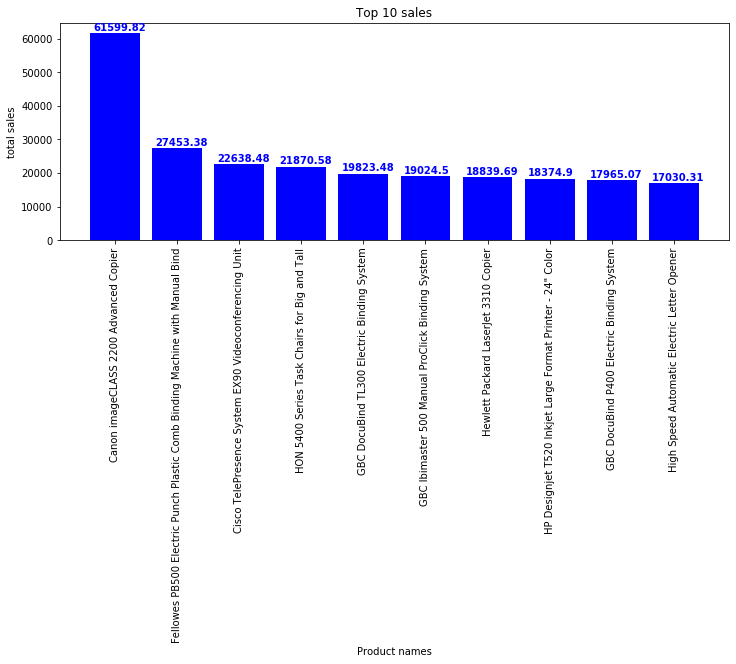

In [16]:
fig,ax = plt.subplots(figsize=(12,4))    
ax.bar(prod_vs_sales.index[:10], prod_vs_sales.Sales[:10], color="blue")
plt.title('Top 10 sales')
plt.xlabel('Product names')
plt.ylabel('total sales')      
for i, v in enumerate(np.round(prod_vs_sales['Sales'][:10],2)):
    ax.text(i-0.35,v+800, str(v), color='blue', fontweight='bold')
plt.xticks(rotation=90)

plt.show()


In [17]:
np.round(prod_vs_sales.Sales[:5],2)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.82
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.38
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.48
HON 5400 Series Task Chairs for Big and Tall                                   21870.58
GBC DocuBind TL300 Electric Binding System                                     19823.48
Name: Sales, dtype: float64

In [18]:
ship_data=stores_orders['Ship Date']

In [19]:
type(ship_data),ship_data

(pandas.core.series.Series, 0      2017-11-11
 1      2017-11-11
 2      2017-06-16
 3      2016-10-18
 4      2016-10-18
 5      2015-06-14
 6      2015-06-14
 7      2015-06-14
 8      2015-06-14
 9      2015-06-14
 10     2015-06-14
 11     2015-06-14
 12     2018-04-20
 13     2017-12-10
 14     2016-11-26
 15     2016-11-26
 16     2015-11-18
 17     2015-05-15
 18     2015-09-01
 19     2015-09-01
 20     2015-09-01
 21     2017-12-13
 22     2017-12-13
 23     2018-07-18
 24     2016-09-30
 25     2017-01-20
 26     2017-01-20
 27     2016-09-21
 28     2016-09-21
 29     2016-09-21
           ...    
 9964   2017-12-10
 9965   2017-12-10
 9966   2017-12-10
 9967   2018-12-17
 9968   2018-12-17
 9969   2018-12-17
 9970   2016-07-02
 9971   2016-07-02
 9972   2017-09-17
 9973   2017-12-10
 9974   2017-12-10
 9975   2017-12-10
 9976   2017-12-10
 9977   2017-12-10
 9978   2017-12-10
 9979   2017-12-10
 9980   2016-09-09
 9981   2018-08-06
 9982   2017-09-28
 9983   2017-09-28
 998

In [20]:
ship_date=[]
ship_month=[]
ship_year=[]
for data in ship_data:
    ship_year.append(str(data).split('-')[0])
    ship_month.append(str(data).split('-')[1])
    ship_date.append(str(data).split('-')[2])
len(ship_date)

9994

In [21]:
stores_orders['ship_year']=ship_year
stores_orders['ship_month']=ship_month
stores_orders['ship_date']=ship_date

In [22]:
stores_orders.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  ship_year  ship_month    ship_date  
0     0.00   41.9136       2017          11  11 00:00:00  
1     0.00  219.5820       2017          11  11 00:00:00  
2     0.00    6.8714       2017          06  16 00:00:00  
3     0.45 -383.0310       2016          10  18 00:00:00  
4     0.20    2.5164       2016          10  18 00:00:00  

[5 rows x 24 columns]

In [23]:
from termcolor import cprint
years=list(set(ship_year))
cprint("SALES RECORDS OF TOP 2 PRODUCTS", "red")
plt.figure(1,figsize=(16,8))
plt.subplot(121)
y=stores_orders[stores_orders['Product Name']==prod_vs_sales.index[0]]['Sales']
x=stores_orders[stores_orders['Product Name']==prod_vs_sales.index[0]]['ship_year']
plt.plot(sorted(x),y)
plt.title('Sales record of '+prod_vs_sales.index[0])
plt.xticks(list(set(ship_year)))


plt.subplot(122)
y=stores_orders[stores_orders['Product Name']==prod_vs_sales.index[1]]['Sales']
x=stores_orders[stores_orders['Product Name']==prod_vs_sales.index[1]]['ship_year']
plt.plot(sorted(x),y)
plt.title('Sales record of '+prod_vs_sales.index[1])
plt.xticks(list(set(ship_year)))

plt.grid()
plt.show()

ModuleNotFoundError: No module named 'termcolor'

In [24]:
cprint("SALES RECORDS OF TOP 4 CUSTOMERS", "red")
plt.figure(1,figsize=(16,6))
plt.subplot(141)
y=stores_orders[stores_orders['Customer Name']==customer_df.iloc[0]['Customer Name']]['Sales']
x=stores_orders[stores_orders['Customer Name']==customer_df.iloc[0]['Customer Name']]['ship_year']
plt.plot(sorted(x),y)
plt.title('Sales record of '+customer_df.iloc[0]['Customer Name'])
plt.xticks(list(set(ship_year)))


plt.subplot(142)
y=stores_orders[stores_orders['Customer Name']==customer_df.iloc[1]['Customer Name']]['Sales']
x=stores_orders[stores_orders['Customer Name']==customer_df.iloc[1]['Customer Name']]['ship_year']
plt.plot(sorted(x),y)
plt.title('Sales record of '+customer_df.iloc[1]['Customer Name'])
plt.xticks(list(set(ship_year)))

plt.subplot(143)
y=stores_orders[stores_orders['Customer Name']==customer_df.iloc[2]['Customer Name']]['Sales']
x=stores_orders[stores_orders['Customer Name']==customer_df.iloc[2]['Customer Name']]['ship_year']
plt.plot(sorted(x),y)
plt.title('Sales record of '+customer_df.iloc[2]['Customer Name'])
plt.xticks(list(set(ship_year)))

plt.subplot(144)
y=stores_orders[stores_orders['Customer Name']==customer_df.iloc[3]['Customer Name']]['Sales']
x=stores_orders[stores_orders['Customer Name']==customer_df.iloc[3]['Customer Name']]['ship_year']
plt.plot(sorted(x),y)
plt.title('Sales record of '+customer_df.iloc[3]['Customer Name'])
plt.xticks(list(set(ship_year)))


plt.grid()
plt.show()


NameError: name 'cprint' is not defined

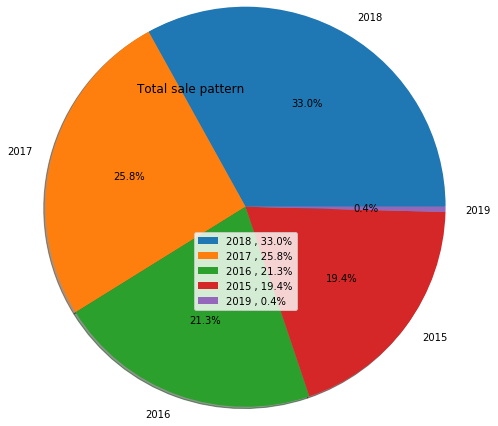

In [25]:
sale_counts=stores_orders['ship_year'].value_counts()
plt.pie(sale_counts.values, labels=sale_counts.index, 
        autopct='%1.1f%%', shadow=True,startangle=0,radius=2.3) #startangle =0 -- horizontal cut
plt.title('Total sale pattern',loc='left')
#plt.axis('equal') # equal enables the circle shape. if 'equal' is written, then radius arguement(size) won't work
plt.legend(loc='lower center',labels=['%s , %1.1f%%' %(i,s*100/np.sum(sale_counts.values)) for i,s in zip(sale_counts.index,sale_counts.values)])
#by default labels in legend stores the data in lables in pie()
plt.show()
